In [1]:
import pandas as pd
import os
import sys

#base_dir = os.path.dirname(os.path.abspath(__file__))
data_path = os.path.join(os.getcwd(), '..', 'src', 'data')
feature_path = os.path.join(os.getcwd(), '..', 'src', 'features')
sys.path.append(data_path)
sys.path.append(feature_path)

import make_dataset
import build_features # type:ignore


H_CONTORTUS_PATH = os.path.join('..', 'data', 'raw', 'ASSAY_S_STERCORALIS.csv')
df = make_dataset.load_data_from_raw(H_CONTORTUS_PATH)

df

,SMILES,ACTIVITY,ACTIVATION_AT_6.8uM
PUBCHEM_RESULT_TAG,,,
1,CCC1=C(CCC(C1C)C(=O)O)C2=CC=C(C=C2)OC,1,60.63
2,C1=CC=C2C(=C1)C(=CN2)CC(=O)NNCC3=CC=C(C=C3)N(C...,1,48.58
3,C1=CC(=C(C=C1Cl)Br)OC2=NC=C(C=C2)C(F)(F)F,1,24.78
4,C1=CC=C(C=C1)NC(=O)CSC2=C(C(=NS2)SCC(=O)NC3=CC...,1,23.27
5,CCN(CC)CCN1C(=O)C2=C3C(=CC=C2)C4=CC=CC=C4C3=N1,1,22.56
...,...,...,...
29992,C1=CC=NC(=C1)CNS(=O)(=O)C2=CC3=C(C=C2)NC(=O)S3,0,-0.22
29993,CC1=CC=C(C=C1)NC(=O)CSC2=NN=C(S2)C3=CN=CC=C3,0,-0.22
29994,CN1C(=C(C(=O)N(C1=O)C)C(=O)COC(=O)C2=CC3=CC=CC...,0,-0.22


In [27]:
smiles = df['SMILES']
lipinski_df = build_features.lipinski(smiles)
lipinski_df.index = df.index

df = pd.concat([df, lipinski_df], axis=1)
df

,SMILES,ACTIVITY,ACTIVATION_AT_6.8uM,MW,LogP,NumHDonors,NumHAcceptors
PUBCHEM_RESULT_TAG,,,,,,,
1,CCC1=C(CCC(C1C)C(=O)O)C2=CC=C(C=C2)OC,1,60.63,274.360,3.98950,1.0,2.0
2,C1=CC=C2C(=C1)C(=CN2)CC(=O)NNCC3=CC=C(C=C3)N(C...,1,48.58,419.356,3.81540,3.0,3.0
3,C1=CC(=C(C=C1Cl)Br)OC2=NC=C(C=C2)C(F)(F)F,1,24.78,352.537,5.30860,0.0,2.0
4,C1=CC=C(C=C1)NC(=O)CSC2=C(C(=NS2)SCC(=O)NC3=CC...,1,23.27,440.575,4.47638,2.0,7.0
5,CCN(CC)CCN1C(=O)C2=C3C(=CC=C2)C4=CC=CC=C4C3=N1,1,22.56,319.408,3.38570,0.0,4.0
...,...,...,...,...,...,...,...
29992,C1=CC=NC(=C1)CNS(=O)(=O)C2=CC3=C(C=C2)NC(=O)S3,0,-0.22,321.383,1.46310,2.0,5.0
29993,CC1=CC=C(C=C1)NC(=O)CSC2=NN=C(S2)C3=CN=CC=C3,0,-0.22,342.449,3.63932,1.0,6.0
29994,CN1C(=C(C(=O)N(C1=O)C)C(=O)COC(=O)C2=CC3=CC=CC...,0,-0.22,383.360,0.56470,2.0,9.0


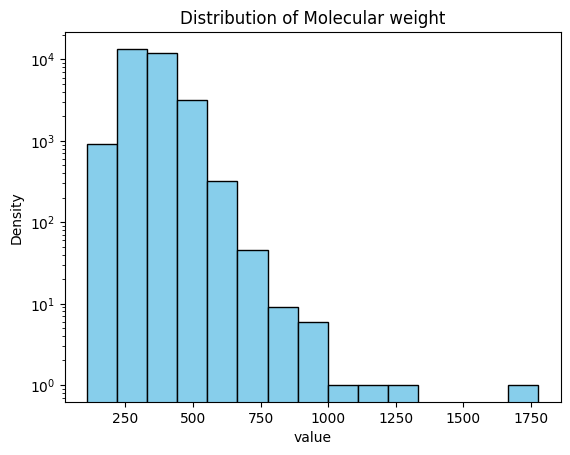

In [28]:
import matplotlib.pyplot as plt

plt.hist(df['MW'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of Molecular weight')
plt.yscale('log')
plt.xlabel('value')
plt.ylabel('Density')
plt.show()

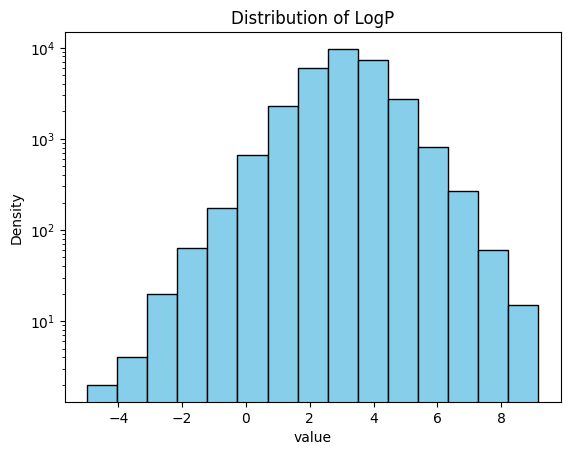

In [29]:
import matplotlib.pyplot as plt

plt.hist(df['LogP'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of LogP')
plt.yscale('log')
plt.xlabel('value')
plt.ylabel('Density')
plt.show()

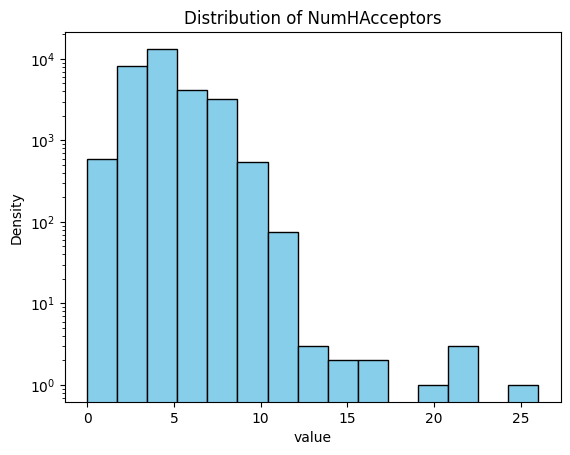

In [30]:


plt.hist(df['NumHAcceptors'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of NumHAcceptors')
plt.yscale('log')
plt.xlabel('value')
plt.ylabel('Density')
plt.show()




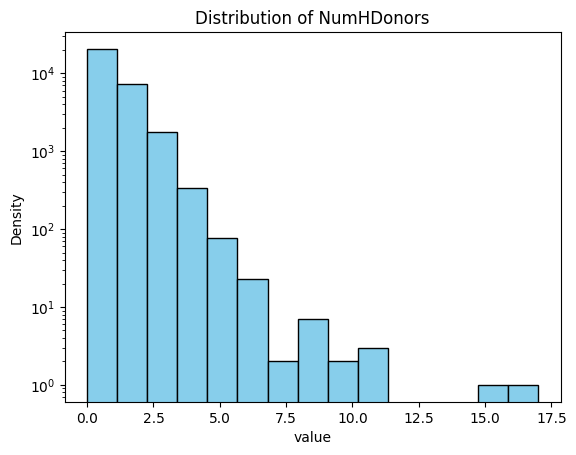

In [31]:
plt.hist(df['NumHDonors'], bins=15, color='skyblue', edgecolor='black')
plt.title('Distribution of NumHDonors')
plt.yscale('log')
plt.xlabel('value')
plt.ylabel('Density')
plt.show()

In [32]:
def lipinski_filter(row):
    mol_w = True if (row.MW <= 500) else False
    LogP = True if (row['LogP'] <= 5) else False
    H_Acceptors = True if (row['NumHAcceptors'] <= 10) else False
    H_donors = True if (row['NumHDonors'] <= 5) else False
    
    conditions = [mol_w, LogP, H_Acceptors, H_donors]
    
    # if three or more of the conditions are satisfied return trye, else false 
    return conditions.count(True) >= 3


df['new'] = df.apply(lipinski_filter, axis=1)
df

,SMILES,ACTIVITY,ACTIVATION_AT_6.8uM,MW,LogP,NumHDonors,NumHAcceptors,new
PUBCHEM_RESULT_TAG,,,,,,,,
1,CCC1=C(CCC(C1C)C(=O)O)C2=CC=C(C=C2)OC,1,60.63,274.360,3.98950,1.0,2.0,True
2,C1=CC=C2C(=C1)C(=CN2)CC(=O)NNCC3=CC=C(C=C3)N(C...,1,48.58,419.356,3.81540,3.0,3.0,True
3,C1=CC(=C(C=C1Cl)Br)OC2=NC=C(C=C2)C(F)(F)F,1,24.78,352.537,5.30860,0.0,2.0,True
4,C1=CC=C(C=C1)NC(=O)CSC2=C(C(=NS2)SCC(=O)NC3=CC...,1,23.27,440.575,4.47638,2.0,7.0,True
5,CCN(CC)CCN1C(=O)C2=C3C(=CC=C2)C4=CC=CC=C4C3=N1,1,22.56,319.408,3.38570,0.0,4.0,True
...,...,...,...,...,...,...,...,...
29992,C1=CC=NC(=C1)CNS(=O)(=O)C2=CC3=C(C=C2)NC(=O)S3,0,-0.22,321.383,1.46310,2.0,5.0,True
29993,CC1=CC=C(C=C1)NC(=O)CSC2=NN=C(S2)C3=CN=CC=C3,0,-0.22,342.449,3.63932,1.0,6.0,True
29994,CN1C(=C(C(=O)N(C1=O)C)C(=O)COC(=O)C2=CC3=CC=CC...,0,-0.22,383.360,0.56470,2.0,9.0,True


In [33]:
df[df['new'] == True]['ACTIVITY'].value_counts()

ACTIVITY
0    25912
1     3653
Name: count, dtype: int64

In [34]:
df_filtered = df[df['new'] == True]
df_filtered

,SMILES,ACTIVITY,ACTIVATION_AT_6.8uM,MW,LogP,NumHDonors,NumHAcceptors,new
PUBCHEM_RESULT_TAG,,,,,,,,
1,CCC1=C(CCC(C1C)C(=O)O)C2=CC=C(C=C2)OC,1,60.63,274.360,3.98950,1.0,2.0,True
2,C1=CC=C2C(=C1)C(=CN2)CC(=O)NNCC3=CC=C(C=C3)N(C...,1,48.58,419.356,3.81540,3.0,3.0,True
3,C1=CC(=C(C=C1Cl)Br)OC2=NC=C(C=C2)C(F)(F)F,1,24.78,352.537,5.30860,0.0,2.0,True
4,C1=CC=C(C=C1)NC(=O)CSC2=C(C(=NS2)SCC(=O)NC3=CC...,1,23.27,440.575,4.47638,2.0,7.0,True
5,CCN(CC)CCN1C(=O)C2=C3C(=CC=C2)C4=CC=CC=C4C3=N1,1,22.56,319.408,3.38570,0.0,4.0,True
...,...,...,...,...,...,...,...,...
29992,C1=CC=NC(=C1)CNS(=O)(=O)C2=CC3=C(C=C2)NC(=O)S3,0,-0.22,321.383,1.46310,2.0,5.0,True
29993,CC1=CC=C(C=C1)NC(=O)CSC2=NN=C(S2)C3=CN=CC=C3,0,-0.22,342.449,3.63932,1.0,6.0,True
29994,CN1C(=C(C(=O)N(C1=O)C)C(=O)COC(=O)C2=CC3=CC=CC...,0,-0.22,383.360,0.56470,2.0,9.0,True


## Computing Fingerprints

C:\Users\Gabriel Anyaele\AppData\Local\Temp\ipykernel_20724\2250296759.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  one_smile = df_filtered['SMILES'][0]


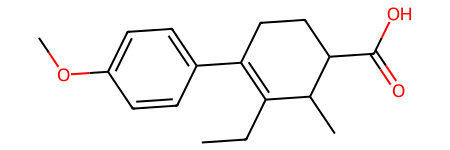

In [35]:
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np

one_smile = df_filtered['SMILES'][0]
one_mol = Chem.MolFromSmiles(one_smile)
one_mol

In [36]:
one_fp = AllChem.GetMorganFingerprintAsBitVect(one_mol, radius=2, nBits=2048, useFeatures=True)
one_fp = np.array(one_fp)
one_fp


array([1, 1, 1, ..., 0, 0, 0])

In [37]:
## for all smiles

smiles_list = df_filtered['SMILES']
stercoralis_fp = build_features.morgan_descriptors(smiles_list)

In [39]:
stercoralis_fp

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2038,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29562,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29563,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
stercoralis_fp.index = df_filtered.index
stercoralis_fp['ACTIVITY'] = df_filtered['ACTIVITY']

In [41]:
stercoralis_fp

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047,ACTIVITY
PUBCHEM_RESULT_TAG,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# stercoralis_fp.to_pickle(os.path.join('..', 'data', 'interim', '02_S_Stercoralis_fps.pkl'))

In [35]:
stercoralis_fp.isna().sum()

morgan_0       0
morgan_1       0
morgan_2       0
morgan_3       0
morgan_4       0
              ..
morgan_2044    0
morgan_2045    0
morgan_2046    0
morgan_2047    0
ACTIVITY       0
Length: 2049, dtype: int64

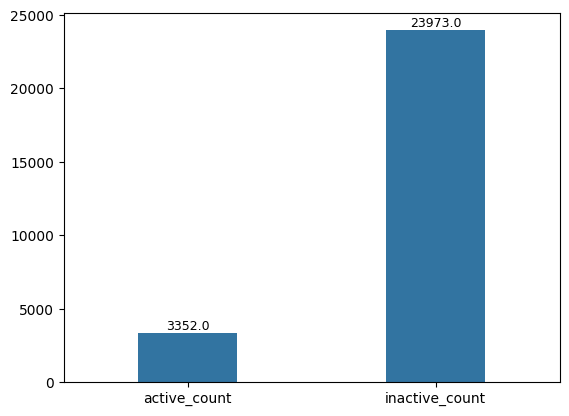

In [49]:
counts = {
    'active_count': df_filtered['ACTIVITY'].value_counts()[1],
    'inactive_count': df_filtered['ACTIVITY'].value_counts()[0]
}

names = list(counts.keys())
values = list(counts.values())



import seaborn as sns
plots = sns.barplot(x=names, y=values,width=0.4)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() /2, bar.get_height()), ha='center', va='center', size=9, xytext=(0,5), textcoords='offset points')

In [55]:
# Ratio

print(f'Ratio => {1} : {round( 23973 / 3352)}')


Ratio => 1 : 7


## Modelling

In [1]:
import pandas as pd
import numpy as np
import os

path = os.path.join('..', 'data', 'interim', '02_S_Stercoralis_fps.pkl')
df = pd.read_pickle(path)
df

,morgan_0,morgan_1,morgan_2,morgan_3,morgan_4,morgan_5,morgan_6,morgan_7,morgan_8,morgan_9,...,morgan_2039,morgan_2040,morgan_2041,morgan_2042,morgan_2043,morgan_2044,morgan_2045,morgan_2046,morgan_2047,ACTIVITY
PUBCHEM_RESULT_TAG,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
from sklearn.model_selection import train_test_split


X = df.loc[:, df.columns != 'ACTIVITY']
y = df['ACTIVITY']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.3, shuffle=True)

In [3]:
y_train.value_counts()

ACTIVITY
0    18147
1     2548
Name: count, dtype: int64

In [56]:
y_test.value_counts()

ACTIVITY
0    7765
1    1105
Name: count, dtype: int64

## Initial model development

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


rfc = RandomForestClassifier(n_estimators=700)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {round(accuracy * 100, 2)}')
print(f'Recall: {round(recall * 100, 2)}')
print(f'f1-score: {round(f1 * 100, 2)}')

Accuracy: 87.52
Reacall: 6.7
f1-score: 11.79


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7765
           1       0.49      0.07      0.12      1105

    accuracy                           0.88      8870
   macro avg       0.69      0.53      0.53      8870
weighted avg       0.83      0.88      0.83      8870



In [ ]:
import matplotlib.pyplot as plt

def plot_classification_report(y_test, y_pred):
    report = classification_report(y_test, y_pred, output_dict=True)
    keys = ['0', '1']

    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = np.array([[report[key][metric] for metric in metrics] for key in keys])
    fig, ax = plt.subplots(figsize=(12, 6))
    cax = ax.matshow(data, cmap='coolwarm')
    plt.xticks(range(len(metrics)), metrics)
    plt.yticks(range(len(keys)), keys)
    plt.colorbar(cax)
    # Adding the text
    for (i, j), val in np.ndenumerate(data):
        ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')
    plt.xlabel('Metrics')
    plt.ylabel('Classes')
    plt.title('Classification Report with Support')
    plt.show()
    

plot_classification_report(y_test, y_pred)

# Sampling

In [11]:
y_train.value_counts()

ACTIVITY
0    18147
1     2548
Name: count, dtype: int64

In [14]:
18147 - 3000

15147

In [84]:
from sklearn.utils import shuffle


keep_index = list(shuffle(y_train[y_train == 0]).index)[:3000]
keep_index.extend(list(y_train[y_train == 1].index))

In [85]:
X_resampled = X_train.loc[keep_index]
y_resampled = y_train.loc[keep_index]

In [86]:
y_resampled.value_counts()

ACTIVITY
0    3000
1    2548
Name: count, dtype: int64

In [87]:
rfc_resampled = RandomForestClassifier(n_estimators=700).fit(X_resampled, y_resampled)
y_pred_resampled = rfc_resampled.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred_resampled)
recall = recall_score(y_test, y_pred_resampled)
f1 = f1_score(y_test, y_pred_resampled)

print(f'Accuracy: {round(accuracy * 100, 2)}')
print(f'Recall: {round(recall * 100, 2)}')
print(f'f1-score: {round(f1 * 100, 2)}')



# prev
# accuracy - 87.52
# recall - 6.7
# f1-score - 11.79

Accuracy: 72.87
Recall: 53.94
f1-score: 33.13


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

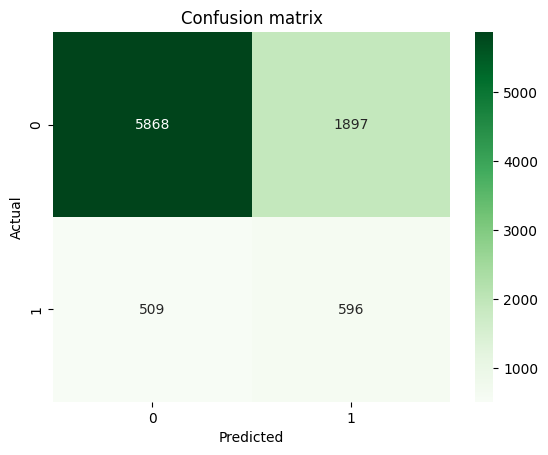

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_resampled)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_resampled).ravel()

ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='Greens')

#labels, title and ticks
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels([ '0', '1'])
ax.yaxis.set_ticklabels([ '0', '1'])


#  (7689, 76, 1031, 74)  (tn, fp, fn, tp)

Positive predictions feels like a guess work

Model incorrectly predicts entries to be inactive, whilst they are actives

Possible Causes
1. Model is bias (poorly resampled)
2. Feature Engineering (features used does not accurately distinguish the positives from negatives)
3. Not enough data to distinguish the two classess (underfitting)

## Near miss Undersampling

Calculate the distances between all instances of the majority class and the instances of the minority class

Then n instancs of the majority class that have the smallest distances to those in the minority class are selected



In [59]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=3)

X_res, y_res = nm.fit_resample(X_train, y_train)

rfc_nm = RandomForestClassifier(n_estimators=700).fit(X_res, y_res)

y_pred_nm = rfc_nm.predict(X_test)

In [58]:
y_res.value_counts()

ACTIVITY
0    2548
1    2548
Name: count, dtype: int64

In [60]:
print(classification_report(y_test, y_pred_nm))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79      7765
           1       0.21      0.58      0.31      1105

    accuracy                           0.68      8870
   macro avg       0.56      0.63      0.55      8870
weighted avg       0.83      0.68      0.73      8870



In [61]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_nm).ravel()
(tn, fp, fn, tp)

(5363, 2402, 468, 637)

In [62]:
print(accuracy_score(y_test, y_pred_nm))
print(recall_score(y_test, y_pred_nm))
print(f1_score(y_test, y_pred_nm))

0.6764374295377678
0.5764705882352941
0.30743243243243246


In [ ]:
# plot_classification_report(y_test, y_pred)

In [142]:
from sklearn.metrics import accuracy_score, f1_score

print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.6777903043968433
0.30563654033041787


## Random sampling

In [152]:
len(y_train[y_train == 0])

18147

In [156]:
X_rand_index = list(X_train[y_train == 0].index[0:2500])
X_rand = X_train.loc[X_rand_index, :]


In [171]:
y_rand = y_train.loc[X_rand_index]
y_rand[y_rand == 1]

Series([], Name: ACTIVITY, dtype: int64)

## cross validatio

In [57]:
from sklearn.utils import shuffle
shuffled_resampled = shuffle(resampled_df)

In [58]:
X_resampled = shuffled_resampled.loc[:, shuffled_resampled.columns != 'ACTIVITY']
y_resampled = shuffled_resampled['ACTIVITY']


In [83]:
from sklearn.model_selection import train_test_split


X_raw = df.loc[:, df.columns != 'ACTIVITY']
y_raw = df['ACTIVITY']
X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, random_state=104, test_size=0.3, shuffle=True)

In [85]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators=1200)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

In [87]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7765
           1       0.47      0.06      0.11      1105

    accuracy                           0.87      8870
   macro avg       0.68      0.53      0.52      8870
weighted avg       0.83      0.87      0.83      8870



In [88]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

print('accuracy: ',accuracy_score(y_test, y_pred))
print('recall: ',recall_score(y_test,y_pred ))
print('precision: ', precision_score(y_test, y_pred))
print('f1_score: ', f1_score(y_test, y_pred))
print('roc_auc_score: ', roc_auc_score(y_test, y_pred))

accuracy:  0.8745208568207441
recall:  0.06334841628959276
precision:  0.47297297297297297
f1_score:  0.11173184357541899
roc_auc_score:  0.5266516711196837


In [62]:
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# knn = KNeighborsClassifier(n_neighbors = 3)
# svc = SVC(kernel="rbf")
rfc = RandomForestClassifier(n_estimators=50)
cv_results = cross_validate(rfc, X_resampled, y_resampled, cv=5, scoring='recall')

In [63]:
cv_results

{'fit_time': array([3.19884944, 3.24949765, 3.2479136 , 3.26677227, 3.16536045]),
 'score_time': array([0.06663322, 0.0518682 , 0.06661654, 0.04981327, 0.05209661]),
 'test_score': array([0.53898769, 0.51709986, 0.5745554 , 0.56438356, 0.59041096])}

In [42]:
cv_results

{'fit_time': array([43.60646629, 35.99669576, 38.16104937, 39.12522364, 38.94500852]),
 'score_time': array([15.96543884, 16.79825234, 16.73731756, 15.28062534, 15.53118777]),
 'test_score': array([0.67989056, 0.57045144, 0.52393981, 0.5       , 0.45890411])}

In [34]:
cv_results

{'fit_time': array([127.85875845, 106.55398488,  86.35434842,  87.53972268,
         87.00554562]),
 'score_time': array([37.9430244 , 35.91078496, 37.56174397, 36.03224516, 37.1441505 ]),
 'test_score': array([0.67301961, 0.62859325, 0.59757319, 0.598779  , 0.58768539])}